## Importing pandas and matplotlib to plot the data to see which flairs are relevant to us

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### Using the news and the all year top posts for our dataset

In [19]:
df = pd.read_csv('new_posts.csv')

In [20]:
df = df.append(pd.read_csv('top_posts_year.csv'))

In [21]:
df['flair'] = df['flair'].fillna('Unknown')

### Dropping the duplicate entries in the dataset to clean data further


In [22]:
df = df.drop_duplicates()

### Post count per flair, we will be selecting the top 12 posts

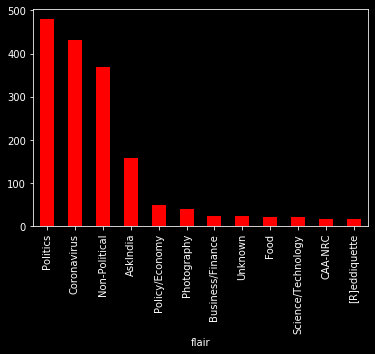

In [23]:
df.groupby(by='flair').count().nlargest(12, 'id')['id'].plot(kind='bar', colormap='hsv')

In [24]:
classes = sorted([
    "Politics",
    "Coronavirus",
    "Non-Political",
    "AskIndia",
    "Policy/Economy",
    "Photography",
    "Business/Finance",
    "Food",
    "Science/Technology",
    "CAA-NRC",
    "[R]eddiquette",
    "Unknown",
])

In [25]:
classes

['AskIndia',
 'Business/Finance',
 'CAA-NRC',
 'Coronavirus',
 'Food',
 'Non-Political',
 'Photography',
 'Policy/Economy',
 'Politics',
 'Science/Technology',
 'Unknown',
 '[R]eddiquette']

### Selecting only those rows who belong to the above classes

In [26]:
df = df[df.flair.isin(classes)]

### Resetting the index and shuffling the dataset

In [27]:
df = df.sample(frac=1)
df = df.reset_index(col_fill=None, drop=True)

### Since body is mostly null, we can combine that column with title for our data analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 9 columns):
id              1652 non-null object
subreddit       1652 non-null object
title           1652 non-null object
body            354 non-null object
flair           1652 non-null object
url             1652 non-null object
score           1652 non-null int64
num_comments    1652 non-null int64
dated           1652 non-null object
dtypes: int64(2), object(7)
memory usage: 116.3+ KB


In [29]:
df['body'] = df['body'].fillna('')

### Combining the text from title and body into a text column

In [30]:
df['text'] = df['title'] + ' ' + df['body']

### We can now drop the title and body columns

In [31]:
df = df.drop(['title','body'], axis=1)

In [33]:
df['text']

0       Cartoon of the day: Jharkhand Election Results...
1                      My hostel canteen has some advice 
2                               some honesty in this age 
3       Welcome to India, the land of IRONIES! (source...
4       Coronavirus Lockdown: The Seven and a Half Thi...
                              ...                        
1647    Rant: In India everything matters except the r...
1648    Services at Delhi State Cancer Institute suspe...
1649    Kejriwal offers support to Goa govt in setting...
1650    Kerala boy arranges remarriage for his torment...
1651               Meanwhile at Delhi Pride parade today 
Name: text, Length: 1652, dtype: object

### Removing punctuation and extra characters from the dataset and keeping a word_count column

In [34]:
df['text'] = df['text'].str.replace('[^\w\s]', '').str.replace('[\d+]', '')
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [53]:
df

,id,subreddit,flair,url,score,num_comments,dated,text,word_count
0,eejoo0,india,Politics,https://www.reddit.com/r/India/comments/eejoo0,1909,43,2019-12-23 19:52:23,Cartoon of the day Jharkhand Election Results ...,9
1,fhfhka,india,Non-Political,https://www.reddit.com/r/India/comments/fhfhka,1864,95,2020-03-12 20:22:46,My hostel canteen has some advice,6
2,bl5jei,india,Non-Political,https://www.reddit.com/r/India/comments/bl5jei,1833,42,2019-05-06 09:02:23,some honesty in this age,5
3,egrhee,india,Politics,https://www.reddit.com/r/India/comments/egrhee,928,28,2019-12-28 22:43:13,Welcome to India the land of IRONIES source in...,10
4,g1lgm7,india,Coronavirus,https://www.reddit.com/r/India/comments/g1lgm7,1,0,2020-04-15 13:05:55,Coronavirus Lockdown The Seven and a Half Thin...,15
...,...,...,...,...,...,...,...,...,...
1647,e5rae3,india,Politics,https://www.reddit.com/r/India/comments/e5rae3,1630,353,2019-12-04 09:12:26,Rant In India everything matters except the re...,976
1648,fz305g,india,Coronavirus,https://www.reddit.com/r/India/comments/fz305g,16,1,2020-04-11 19:22:14,Services at Delhi State Cancer Institute suspe...,19
1649,fzv6aq,india,Politics,https://www.reddit.com/r/India/comments/fzv6aq,40,3,2020-04-12 19:32:22,Kejriwal offers support to Goa govt in setting...,11
1650,c1jq0m,india,Non-Political,https://www.reddit.com/r/India/comments/c1jq0m,1020,60,2019-06-17 13:23:18,Kerala boy arranges remarriage for his torment...,8


### Import sklearn text module to analyze text

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

### Finding out top phrases in the text.

In [68]:
cvec = CountVectorizer(lowercase=True, stop_words=ENGLISH_STOP_WORDS, ngram_range = (2,2), max_df = .95, min_df= 5)

In [69]:
word_matrix = cvec.fit_transform(df['text'])

In [70]:
word_matrix_df = pd.DataFrame(word_matrix.toarray(), columns = cvec.get_feature_names())

In [71]:
word_matrix_dict = {word: word_matrix_df[word].sum() for word in cvec.get_feature_names()}
word_matrix_df = pd.DataFrame(word_matrix_dict, index = ['count'])
word_matrix_df = word_matrix_df.T


In [73]:
word_matrix_df.sort_values(by='count', ascending = False).head(20)

,count
dont know,28
aarogya setu,25
tamil nadu,20
dont want,20
want know,16
deccan herald,16
covid cases,16
coronavirus lockdown,14
times india,14
need help,14


In [74]:
df.to_csv('dataset.csv', index=None)